<a href="https://colab.research.google.com/github/reginaldrhoe/ML604P1/blob/main/Rhoe_MNIST_Prediction_with_Linear_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: MNIST Prediction with Linear Neural Network

Reginald Rhoe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd #your own google drive directory, make sure you move MNIST data to your directory as well.

Mounted at /content/drive
[Errno 2] No such file or directory: '#your own google drive directory, make sure you move MNIST data to your directory as well.'
/content


Build and train a single-layer neural network (i.e. a linear classifier) to classify handwritten digits from the MNIST dataset. This will help you understand how neural networks work from the ground up using PyTorch.

**Import Required Libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, utils
import numpy as np

**Load the MNIST Dataset**

Use torchvision.datasets and apply a transformation to flatten the image and convert it to a tensor.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.reshape(1, 1, -1)),  # flatten 28x28 to 784
    transforms.Normalize((0.1307,), (0.3081,))
])

**Question 1:** can you explain the mean and standard deviation set above? **[10 points]**

In [ ]:
trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 425kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.03MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.76MB/s]


**Question 2:** What is the sample size of trainset and testset? what is the dimension of each sample? **[10 points]**

In [ ]:
# your answer here:

In [ ]:
print(f"Trainset sample size: {len(trainset)}")
print(f"Testset sample size: {len(testset)}")

# Get the shape of a single sample
image, label = trainset[0]
print(f"Dimension of each sample: {image.shape}")

Trainset sample size: 60000
Testset sample size: 10000
Dimension of each sample: torch.Size([1, 1, 784])


**Question 3:** Have a look at the images and shape in trainset. Visualize some images along with their labels. You may need to reshape the tensor from 784 flat vector to 28x28. **[10 points]**

In [ ]:
# plot a couple of images along with their labels...

**Construct train and test dataloaders**

In [ ]:
batch_size = 128
train_dataloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(testset, batch_size=batch_size, shuffle=True)

In [ ]:
real_batch = next(iter(train_dataloader))

In [ ]:
# shape of each batch tensor
real_batch[0].shape

torch.Size([128, 1, 1, 784])

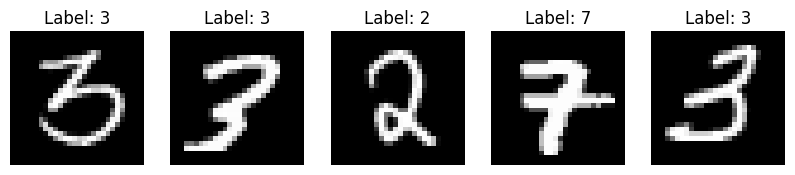

In [ ]:
import matplotlib.pyplot as plt

def imshow(img, title):
    # img is a tensor with shape [1, 1, 784] or [1, 784]
    # We need to reshape it to [28, 28] for plotting
    img = img.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

# Get a batch of training data
images, labels = next(iter(train_dataloader))

# Display a few images
fig = plt.figure(figsize=(10, 5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    imshow(images[i], title=f'Label: {labels[i].item()}')
plt.show()

**Define the Model:**

Implement a single linear layer (784 → 10) with bias. You don't need to implement softmax as it is applied internally in our loss function. Complete the code below. **[10 points]**


In [ ]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        # your code here to define the linear layer self.linear
        self.linear = nn.Linear(784, 10)

    def forward(self, x): return self.linear(x).squeeze()

In [ ]:
model = Mnist_Logistic()

**Define the Loss and Optimizer**

Use nn.CrossEntropyLoss() and an optimizer like SGD. You can start with 1e-2 as your learning rate, but you are welcome to choose a better value for this hyper-parameter later.


In [ ]:
lr=1e-2

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

**Activate GPU** by changing device to cuda. Make sure your GPU is enabled in Edit/notebook settings/hardware accelarator

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**Training Loop**

Implement the training loop for one epochs. Save the loss for each batch in a list (train_losses) and plot all the loss values. Complete the code for each commented sentence below it. **[40 points]**

In [ ]:
num_epochs = 1
train_losses = [] # the list to keep all the batch losses

for epoch in range(num_epochs):
    model.to(device)
    model.train()
    for images, labels in train_dataloader:

        # put both images and labels on the device
        images, labels = images.to(device), labels.to(device)

        # feed images to model and create the outputs
        outputs = model(images)

        # calculate the loss value
        loss = loss_func(outputs, labels)

        # calculate the gradients and update the weights using the optimizer
        # make sure you zero the gradients first, the calculate the gradients
        # and finally update the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # save the loss value in train_losses
        train_losses.append(loss.item())


    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}')

Epoch [1/1], Training Loss: 0.4109


**Question 5:** Plot the training losses. Do you see a decrese in your batch loss? **[10 points]**

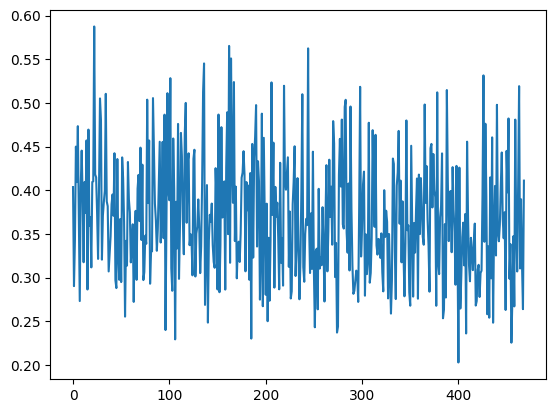

In [ ]:
plt.plot(train_losses)

**Evaluate the Model**

Calculate accuracy on the test set.

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for images, labels in test_dataloader:
      images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      # calculate the softmax of the output to find the probabilites
      softmax = nn.Softmax(dim=1)
      probs = softmax(outputs)

      # find the prediction label by finding the index of the maximum probability
      _, predicted = torch.max(probs, 1)

      # add to the total number of predicted labels
      total += labels.size(0)
      # calculate the correct predictions
      correct += (predicted == labels).sum().item()

  print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 90.88%


**Question:** Inspired by the evaluation code above, can you manually feed five different images from testset and get the predictions from the model? Compare the prediction with the true label, and see if they match. **[10 points]**

Predictions vs True Labels:
  Image index 4068: Predicted = 8, True Label = 8
  Image index 5040: Predicted = 7, True Label = 7
  Image index 2042: Predicted = 0, True Label = 0
  Image index 705: Predicted = 7, True Label = 7
  Image index 4241: Predicted = 0, True Label = 0


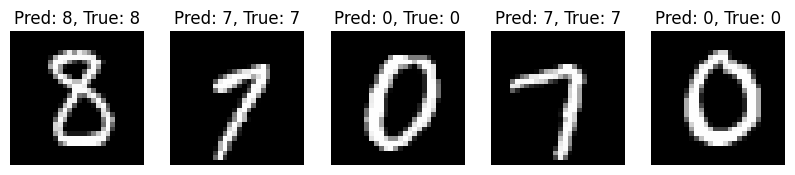

In [ ]:
# Select 5 random indices from the testset
import random
indices = random.sample(range(len(testset)), 5)

model.eval() # Set the model to evaluation mode
images_to_show = []
labels_to_show = []
predicted_to_show = []

with torch.no_grad(): # Disable gradient calculation
    print("Predictions vs True Labels:")
    for i in indices:
        image, label = testset[i]
        # Add a batch dimension and move the image to the device
        image = image.unsqueeze(0).to(device)

        # Get the model's output
        output = model(image)

        # Get the predicted class (index with the highest probability)
        _, predicted = torch.max(output, -1)

        # Print the results
        print(f"  Image index {i}: Predicted = {predicted.item()}, True Label = {label}")

        images_to_show.append(image.squeeze().cpu())
        labels_to_show.append(label)
        predicted_to_show.append(predicted.item())

# Display the images side by side
fig = plt.figure(figsize=(10, 5))
for i in range(len(images_to_show)):
    ax = fig.add_subplot(1, len(images_to_show), i+1)
    imshow(images_to_show[i], title=f'Pred: {predicted_to_show[i]}, True: {labels_to_show[i]}')
plt.show()